In [1]:
import os
import numpy as np
import pandas as pd
from torch.utils.data import DataLoader
from utils import nn_utils, nn_architectures
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import preprocessing

%load_ext autoreload
%autoreload 2

/Users/kabirkumar/opt/anaconda3/envs/PraktikumMLCMS/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# project_path = os.path.dirname(os.path.abspath(os.getcwd())) #85
dataset_path_NO_AT = os.path.join("datasets", "DE_EPF_dataset.csv")
dataset_path_WITH_AT = os.path.join("datasets", "DE_AT_EPF_dataset.csv")

dataset_no_at = pd.read_csv(dataset_path_NO_AT, parse_dates=['Date'])
dataset_w_at = pd.read_csv(dataset_path_WITH_AT, parse_dates=['Date'])

hyper_params_w_at = {'input_dims': 146, 'output_dims': 48}
hyper_params_no_at = {'input_dims': 72, 'output_dims': 24}

In [3]:
dataset_w_at[dataset_w_at['Date'] > '2020-01-01']

,Date,DE_d-1_H0,DE_d-1_H1,DE_d-1_H2,DE_d-1_H3,DE_d-1_H4,DE_d-1_H5,DE_d-1_H6,DE_d-1_H7,DE_d-1_H8,...,DE_H14,DE_H15,DE_H16,DE_H17,DE_H18,DE_H19,DE_H20,DE_H21,DE_H22,DE_H23
1816,2020-01-02,41.88,38.60,36.55,32.32,30.85,30.14,30.17,30.00,30.65,...,44.06,44.84,44.40,46.05,46.72,45.26,39.32,34.06,32.22,24.99
1817,2020-01-03,35.40,31.98,30.50,28.79,28.42,28.75,34.16,42.07,44.89,...,38.11,37.91,38.44,40.47,41.35,33.37,28.89,27.70,25.70,22.04
1818,2020-01-04,21.47,13.04,1.53,0.14,0.85,9.92,24.48,26.68,28.81,...,17.42,20.38,25.08,28.88,32.02,35.35,29.98,34.46,39.75,37.95
1819,2020-01-05,22.90,15.95,16.63,6.45,3.83,0.12,0.07,19.07,17.49,...,34.44,36.10,40.59,44.68,46.16,44.62,39.50,35.76,36.49,30.49
1820,2020-01-06,33.10,32.28,31.18,30.10,29.96,29.88,30.38,31.15,32.09,...,41.22,43.28,43.68,47.90,48.91,45.04,40.28,33.89,33.58,32.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3087,2023-06-26,121.06,113.00,107.95,106.49,101.89,101.93,88.66,79.37,54.00,...,50.93,54.03,64.32,83.48,97.00,109.43,118.00,126.16,129.37,118.06
3088,2023-06-27,119.09,108.63,95.60,89.48,87.63,101.97,128.00,132.05,120.58,...,68.12,77.95,89.05,96.40,113.57,130.41,134.79,130.83,125.06,116.16
3089,2023-06-28,114.23,100.78,93.22,94.12,89.27,92.17,115.29,130.00,127.05,...,95.59,95.39,97.60,107.08,128.92,155.18,167.62,159.10,140.00,121.10
3090,2023-06-29,98.08,90.59,87.09,86.29,87.24,94.39,116.03,131.50,128.15,...,98.60,100.00,101.12,112.03,131.26,166.25,171.58,154.73,141.81,121.11


In [4]:
# minmax_scale = preprocessing.MinMaxScaler(feature_range=(-1, 1))
# plt.plot(dataset_w_at[dataset_w_at['Date'] < '2021-01-01']['Date'], np.array(dataset_w_at[dataset_w_at['Date'] < '2021-01-01']['DE_H21']))

In [5]:
unseen_w_at = dataset_w_at[dataset_w_at['Date'] >= '2023-01-06']
dataset_w_at = dataset_w_at[dataset_w_at['Date'] < '2023-01-06']

unseen_no_at = dataset_no_at[dataset_no_at['Date'] >= '2023-01-06']
dataset_no_at = dataset_no_at[dataset_no_at['Date'] < '2023-01-06']

dataset_w_at = dataset_w_at.drop(['Date'], axis = 1)
dataset_no_at = dataset_no_at.drop(['Date'], axis = 1)

dates_final_preds = unseen_w_at['Date']
unseen_w_at = unseen_w_at.drop(['Date'], axis = 1)
unseen_no_at = unseen_no_at.drop(['Date'], axis = 1)

In [6]:
unseen_w_at.shape

(176, 194)

In [7]:
# dataset_w_at = np.array(dataset_w_at)
# np.array(data_train)[:,:-24].shape
# dataset_w_at.shape

In [8]:
# data_test_w_at.shape

In [9]:
data_train_w_at, data_test_w_at = train_test_split(dataset_w_at, train_size = 0.8, shuffle = True, random_state = 42)
data_train_no_at, data_test_no_at = train_test_split(dataset_no_at, train_size = 0.8, shuffle = True, random_state = 42)

#scale the data to [-1,1]
minmax_scale_w_at = preprocessing.MinMaxScaler(feature_range=(-1, 1))
minmax_scale_no_at = preprocessing.MinMaxScaler(feature_range=(-1, 1))

# minmax_scale = preprocessing.StandardScaler()

data_train_w_at = minmax_scale_w_at.fit_transform(data_train_w_at)
data_test_w_at = minmax_scale_w_at.transform(data_test_w_at)

data_train_no_at = minmax_scale_no_at.fit_transform(data_train_no_at)
data_test_no_at = minmax_scale_no_at.transform(data_test_no_at)

arch_w_at = nn_architectures.get_arch(hyper_params_w_at, [320,200])
arch_no_at = nn_architectures.get_arch(hyper_params_no_at, [320,200])

In [10]:
unseen_w_at = minmax_scale_w_at.transform(unseen_w_at)

In [11]:
unseen_no_at = minmax_scale_no_at.transform(unseen_no_at)

In [12]:
data_train_no_at.shape

(2332, 96)

In [13]:
output_no_at = nn_utils.main(data_train_no_at, data_test_no_at, hyper_params_no_at, arch_no_at)

--------------------------------
FOLD 0
--------------------------------
Reset trainable parameters of layer = Linear(in_features=72, out_features=320, bias=True)
Reset trainable parameters of layer = Linear(in_features=320, out_features=200, bias=True)
Reset trainable parameters of layer = Linear(in_features=200, out_features=24, bias=True)
Starting epoch 1
Starting epoch 2
Starting epoch 3
Starting epoch 4
Starting epoch 5
Starting epoch 6
Starting epoch 7
Starting epoch 8
Starting epoch 9
Starting epoch 10
Starting epoch 11
Starting epoch 12
Starting epoch 13
Starting epoch 14
Starting epoch 15
Starting epoch 16
Starting epoch 17
Starting epoch 18
Starting epoch 19
Starting epoch 20
Starting epoch 21
Starting epoch 22
Starting epoch 23
Starting epoch 24
Starting epoch 25
Starting epoch 26
Starting epoch 27
Starting epoch 28
Starting epoch 29
Starting epoch 30
Starting epoch 31
Starting epoch 32
Starting epoch 33
Starting epoch 34
Starting epoch 35
Starting epoch 36
Starting epoch 37

In [14]:
output_w_at = nn_utils.main(data_train_w_at, data_test_w_at, hyper_params_w_at, arch_w_at)

--------------------------------
FOLD 0
--------------------------------
Reset trainable parameters of layer = Linear(in_features=146, out_features=320, bias=True)
Reset trainable parameters of layer = Linear(in_features=320, out_features=200, bias=True)
Reset trainable parameters of layer = Linear(in_features=200, out_features=48, bias=True)
Starting epoch 1
Starting epoch 2
Starting epoch 3
Starting epoch 4
Starting epoch 5
Starting epoch 6
Starting epoch 7
Starting epoch 8
Starting epoch 9
Starting epoch 10
Starting epoch 11
Starting epoch 12
Starting epoch 13
Starting epoch 14
Starting epoch 15
Starting epoch 16
Starting epoch 17
Starting epoch 18
Starting epoch 19
Starting epoch 20
Starting epoch 21
Starting epoch 22
Starting epoch 23
Starting epoch 24
Starting epoch 25
Starting epoch 26
Starting epoch 27
Starting epoch 28
Starting epoch 29
Starting epoch 30
Starting epoch 31
Starting epoch 32
Starting epoch 33
Starting epoch 34
Starting epoch 35
Starting epoch 36
Starting epoch 3

In [15]:
output_no_at

{'tr': 0.030190320685505867,
 'val': 0.033971474402480654,
 'test': 0.03630700232461095,
 'models': [nn_net(
    (layers): Sequential(
      (0): Linear(in_features=72, out_features=320, bias=True)
      (1): ReLU()
      (2): Linear(in_features=320, out_features=200, bias=True)
      (3): ReLU()
      (4): Linear(in_features=200, out_features=24, bias=True)
    )
  ),
  nn_net(
    (layers): Sequential(
      (0): Linear(in_features=72, out_features=320, bias=True)
      (1): ReLU()
      (2): Linear(in_features=320, out_features=200, bias=True)
      (3): ReLU()
      (4): Linear(in_features=200, out_features=24, bias=True)
    )
  )]}

In [16]:
output_w_at

{'tr': 0.022131480276584625,
 'val': 0.024890674743801355,
 'test': 0.026273010578006507,
 'models': [nn_net(
    (layers): Sequential(
      (0): Linear(in_features=146, out_features=320, bias=True)
      (1): ReLU()
      (2): Linear(in_features=320, out_features=200, bias=True)
      (3): ReLU()
      (4): Linear(in_features=200, out_features=48, bias=True)
    )
  ),
  nn_net(
    (layers): Sequential(
      (0): Linear(in_features=146, out_features=320, bias=True)
      (1): ReLU()
      (2): Linear(in_features=320, out_features=200, bias=True)
      (3): ReLU()
      (4): Linear(in_features=200, out_features=48, bias=True)
    )
  )]}

In [17]:
unseen_no_at.shape

(176, 96)

In [18]:
preds_no_at = nn_utils.get_preds(unseen_no_at, output_no_at['models'][-1], hyper_params_no_at)
preds_w_at = nn_utils.get_preds(unseen_w_at, output_w_at['models'][-1], hyper_params_w_at)

In [19]:
preds_no_at = preds_no_at.reshape(preds_no_at.shape[0], preds_no_at.shape[-1])
preds_w_at = preds_w_at.reshape(preds_w_at.shape[0], preds_w_at.shape[-1])

result_no_at = np.zeros(unseen_no_at.shape)
result_w_at = np.zeros(unseen_w_at.shape)

result_no_at[:,-hyper_params_no_at['output_dims']:] = preds_no_at
result_w_at[:,-hyper_params_w_at['output_dims']:] = preds_w_at

In [20]:
unseen_w_at = minmax_scale_w_at.inverse_transform(unseen_w_at)
result_w_at = minmax_scale_w_at.inverse_transform(result_w_at)

unseen_no_at = minmax_scale_no_at.inverse_transform(unseen_no_at)
result_no_at = minmax_scale_no_at.inverse_transform(result_no_at)

Text(0.04, 0.5, 'Electricity Price')

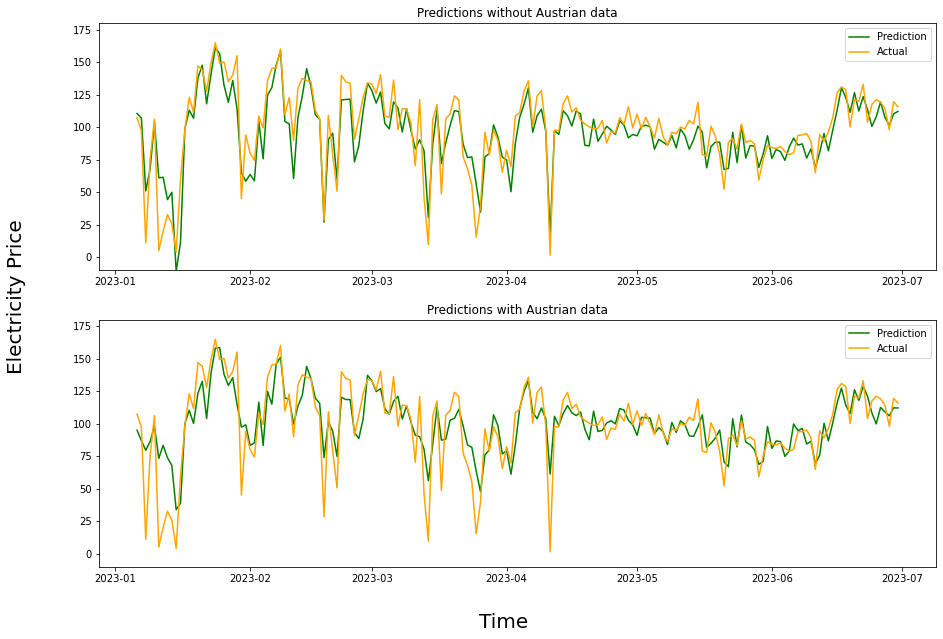

In [21]:
fig, ax = plt.subplots(2, 1, figsize = (15,10))

# fig.figure(figsize=(15,5))
ax[0].plot(dates_final_preds, result_no_at[:,-24], c = 'green', label = "Prediction")
ax[0].plot(dates_final_preds, unseen_no_at[:,-24], c = 'orange', label = "Actual")
ax[0].axis(ymin=-10,ymax=180)
ax[0].title.set_text("Predictions without Austrian data")
ax[0].legend()

ax[1].plot(dates_final_preds, result_w_at[:,-24], c = 'green', label = "Prediction")
ax[1].plot(dates_final_preds, unseen_w_at[:,-24], c = 'orange', label = "Actual")
# ax[1].axis(xmin=-10,xmax=180)
ax[1].axis(ymin=-10,ymax=180)
ax[1].title.set_text("Predictions with Austrian data")
ax[1].legend()

fig.text(0.5, 0.04, 'Time', ha='center', fontsize = 20)
fig.text(0.04, 0.5, 'Electricity Price', va='center', rotation='vertical', fontsize = 20)


(-10.0, 180.0)

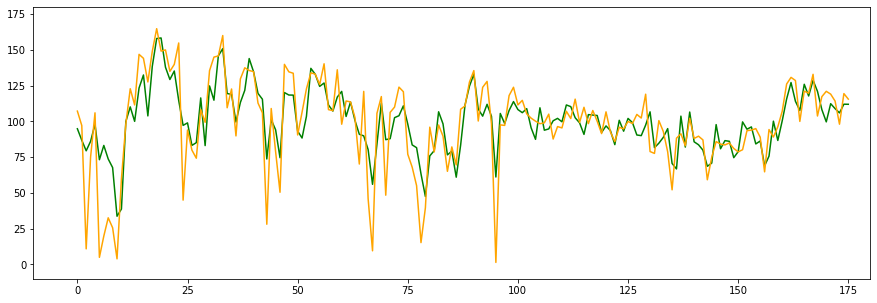

In [22]:
plt.figure(figsize=(15,5))
plt.plot(result_w_at[:,-24], c = 'green')
plt.plot(unseen_w_at[:,-24], c = 'orange')
plt.ylim(-10, 180)
plt.xlim(-10, 180)

In [23]:
unseen[:,-24:]

NameError: name 'unseen' is not defined